# <center>Facial Expression Recognition</center>

<B>Introduction</B>

In the major project, we will be working with a specified dataset of images.  we will then explore the data and try the statistical learning approaches that we have covered in this course to tackle the task associated with the dataset.  The statistical approaches should cover both conventional machine learning (i.e. not deep learning), from the first half of the unit, and deep learning from the second half.  A goal of the project is to explore the approaches we've leant, or perhaps beyond those, in order to build a high-performing system.


<B>Project Goal</B>

The goal of this project is to predict the expression on the face.  The expression labels are standard ones used in psychology research: angry, disgusted, fearful, happy, sad, surprised, neutral.

<hr/>

We will using the ML/DL models in the analysis which are stated below as:

<B>Conventional Models</B>

1. Support Vector Machines (SVM)
2. Light Gradient Boosting Machine (LGBM)


<B>Deep Learning</B>

1. Convolutional Neural Network (Part 1)
2. Convolutional Neural Network (Part 2)

<hr/>

<B>Data Set</B>

The dataset have images of the faces which have the expressions or 7 classes as angry, disgusted, fearful, happy, sad, surprised, neutral.The Images pixel size is 48 x 48 grey scaled. 

<b>Train data</b> - (9328, 48, 48)

<b>Public Test data</b> - (1136, 48, 48)
    
<b>Private Test data</b> - (1153, 48, 48)

<hr/>
<br/>
<br/>

# 1. Setting the stage

1. Import necessary libraries
2. Create directories
3. Load dataset - Training, Public, & Private
4. Samples of images as per their expressions
<hr/>

### 1.1 Import necessary libraries

In [1]:
# Data Preprocessing & Computation 
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Conventional Models
from sklearn.svm import SVC
import lightgbm as lgb

# Deep Learning Models
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.losses import categorical_crossentropy,BinaryCrossentropy
from keras.utils import np_utils
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv2D, Activation, MaxPooling2D, MaxPool2D, Dropout, Dense, \
BatchNormalization, Flatten, AveragePooling2D
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from keras.optimizers import Adam
from tensorflow import keras

keras.backend.clear_session()


# Miscellaneous
from os.path import join
import os
import pickle

Using TensorFlow backend.


### 1.2 Create directories

In [2]:
# Folder path to Store Models
model_directory = r"./models"

# Folder path to Store CSV results for submissions 
result_directory = r"./result"

if not os.path.exists(model_directory):
    os.makedirs(model_directory)
    
if not os.path.exists(result_directory):
    os.makedirs(result_directory)

### 1.3 Load Dataset

In [3]:
image_size = 48

dataset_parent_directory = './dataset'  

images_train_raw = np.load(join(dataset_parent_directory, 'Training_data_images.npy'))
labels_train_raw = np.load(join(dataset_parent_directory, 'Training_data_labels.npy'))
images_test_public_raw = np.load(join(dataset_parent_directory, 'PublicTest_data_images.npy'))
images_test_private_raw = np.load(join(dataset_parent_directory, 'PrivateTest_data_images.npy'))

### 1.4 Samples of images as per their expressions

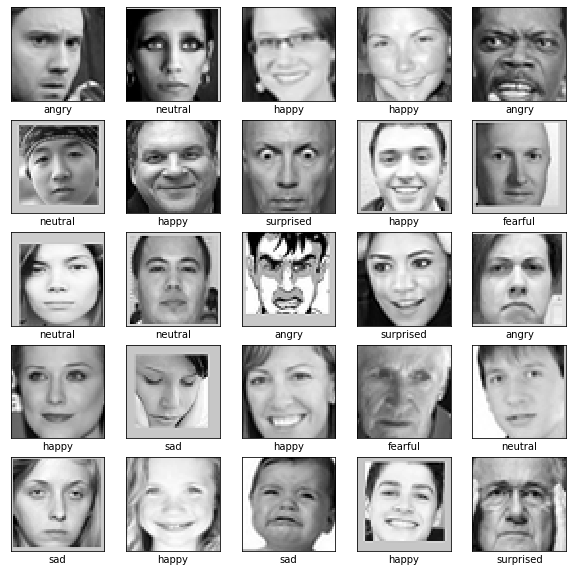

In [4]:
EMOTIONS = ['angry', 'disgusted', 'fearful','happy', 'sad', 'surprised', 'neutral']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_train_raw[i], cmap='gray')
    plt.xlabel( EMOTIONS[ labels_train_raw[i] ] )
plt.show()

<br><hr/>

# 2. Conventional ML Model

1. Preprocess Data
2. Spliting Training dataset
3. Support Vector Machines (SVM)
4. Light Gradient Boosting Machine (LGBM)
5. Predict on Public Dataset
6. Predict on Private Dataset
7. Notes on the Conventional ML Model
<hr/>

### 2.1 Preprocess Data

In [5]:
images_train = images_train_raw.reshape([-1, image_size, image_size])
images_test_public = images_test_public_raw.reshape([-1, image_size, image_size])
images_test_private = images_test_private_raw.reshape([-1, image_size, image_size])

In [6]:
images_train = images_train.reshape(images_train.shape[0], 48, 48, 1)
images_train = images_train.astype("float") / 255.0

images_test_public = images_test_public.reshape(images_test_public.shape[0], 48, 48, 1)
images_test_public = images_test_public.astype("float") / 255.0

images_test_private = images_test_private.reshape(images_test_private.shape[0], 48, 48, 1)
images_test_private = images_test_private.astype("float") / 255.0

In [7]:
def get_flattened_array(size,input_array):
    flattened_array = []
    for i in range(size):
        output = input_array[i].ravel()
        flattened_array.append(output)
    return flattened_array

images_train = get_flattened_array(9328,images_train)
test_img_public =get_flattened_array(1136,images_test_public)
test_img_private =get_flattened_array(1153,images_test_private)

### 2.2 Spliting Training dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images_train, labels_train_raw, test_size=0.50, random_state=42)

### 2.3 Support Vector Machine (SVM)

In [9]:
# Initialize Support Vector Classifier 
svc_classifier = SVC(C=100, kernel='rbf',gamma='scale', 
          random_state=42)

In [10]:
# Fitting the model on the train data and training it
svc_fitted_model = svc_classifier.fit(X_train, y_train) 

In [11]:
# Predict on test data
y_pred_svc = svc_classifier.predict(X_test)

In [12]:
# Export model to disk.
pickle.dump(svc_fitted_model, open(os.path.join(model_directory , "svc_classifier.sav"), 'wb'))

In [13]:
# Calculate accuracy of the model
accuracy_score(y_test,y_pred_svc)

0.508147512864494

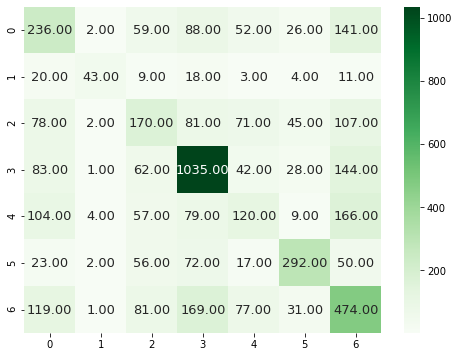

In [14]:
# Plot confusion matrix using seaborn instance
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(8,6))
cf_matrix = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cf_matrix, annot=True, fmt='.2f', annot_kws={"size": 13}, 
                                cmap = 'Greens')

### 2.4 Light Gradient Boosting Machine (LGBM)

In [15]:
# Initialize Light Gradient Boosting Machine
lgbm_classifier = lgb.LGBMClassifier(n_estimators=500)

In [16]:
# Fitting the model on the train data and training it
lgbm_fitted_model = lgbm_classifier.fit(X_train, y_train, verbose=1)

In [17]:
# Predict on test data
y_pred_lgbm = lgbm_classifier.predict(X_test)

In [18]:
# Export model to disk.
pickle.dump(lgbm_fitted_model, open(os.path.join(model_directory , "lgbm_classifier.sav"), 'wb'))

In [19]:
# Calculate accuracy of the model
accuracy_score(y_test,y_pred_lgbm)

0.5529588336192109

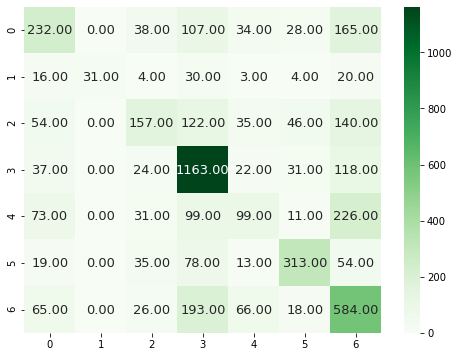

In [20]:
# Plot confusion matrix using seaborn instance
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(8,6))
cf_matrix = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cf_matrix, annot=True, fmt='.2f', annot_kws={"size": 13}, 
                                cmap = 'Greens')

### 2.5 Predict on Public Dataset

In [21]:
# 1 SVC
testing_public_dataset = pd.read_csv(os.path.join(result_directory ,"predictions_label0.csv"))
testing_public_dataset = testing_public_dataset.drop(['Predictions'], axis=1)

public_test_prediction_svc = svc_classifier.predict(test_img_public)
testing_public_dataset['Predictions'] = public_test_prediction_svc
testing_public_dataset.to_csv(os.path.join(result_directory ,"45784477-conv_public_svc.csv"), index=False)

In [22]:
# 2 LGBM
testing_public_dataset = pd.read_csv(os.path.join(result_directory ,"predictions_label0.csv"))
testing_public_dataset = testing_public_dataset.drop(['Predictions'], axis=1)

public_test_prediction_lgbm = lgbm_classifier.predict(test_img_public)
testing_public_dataset['Predictions'] = public_test_prediction_lgbm
testing_public_dataset.to_csv(os.path.join(result_directory ,"45784477-conv_public_lgbm.csv"), index=False)

### 2.6 Predict on Private Dataset

In [23]:
# 1 SVC
testing_private_dataset = pd.read_csv(os.path.join(result_directory ,"private_predictions_label0.csv"))
testing_private_dataset = testing_private_dataset.drop(['Predictions'], axis=1)

private_test_prediction_svc = svc_classifier.predict(test_img_private)
testing_private_dataset['Predictions'] = private_test_prediction_svc
testing_private_dataset.to_csv(os.path.join(result_directory ,"45784477-conv_private_svc.csv"), index=False)

In [25]:
# 2 LGBM
testing_private_dataset = pd.read_csv(os.path.join(result_directory ,"private_predictions_label0.csv"))
testing_private_dataset = testing_private_dataset.drop(['Predictions'], axis=1)

public_test_prediction_lgbm = lgbm_classifier.predict(test_img_private)
testing_private_dataset['Predictions'] = public_test_prediction_lgbm
testing_private_dataset.to_csv(os.path.join(result_directory ,"45784477-conv_private_lgbm.csv"), index=False)

### 2.7 Notes on the Conventional ML Model


We have performed predictive analysis using two conventional models and the model we are choosing  is lgbm based on the models accuracy and performance which is 55% (+5% than SVC) while training with the 'n_estimators'= 200.

We have also tuned hyperparameter __n_estimators = 200__ to achieve higher accuracy and based on this we have selected LGBM for the kaggle competition.

[Why does Gradient Boosting perform better than SVM?](https://www.quora.com/Why-does-XGBoost-perform-better-than-SVM)
1. Gradient Boosting is an ensamble method it uses many trees to take a decision.
2. SVM is a linear separator, when data is not linearly separable SVM needs a Kernel to project the data into a space where it can separate it.

<hr/>

__Accuracy On Public Dataset__

SVC: NA

LGBM: __0.54 (Stand in 35th Place)__ 

<hr/>

__Accuracy On Private Dataset__

SVC: NA

LGBM: NA

<hr/>
<br/>

# 3. Deep Learning Model

1. Preprocess Data
2. Spliting Training dataset for CNN Model 1
3. Build & Train CNN Model 1
4. Spliting Training dataset for CNN Model 2
5. Build & Train CNN Model 2
6. Predict on Public Dataset
7. Predict on Private Dataset
8. Notes on the Deep Learning Model

### 3.1 Preprocess Data

In [26]:
# Training Data
images_train = np.array(images_train_raw,'float32')
images_train -= np.mean(images_train, axis=0)
images_train /= np.std(images_train, axis=0)
images_train = images_train.reshape(images_train.shape[0], 48, 48, 1)
images_train = images_train.astype("float") / 255.0

# Training Labels
num_labels = len(np.unique(labels_train_raw))
labels_train = np.array(labels_train_raw,'float32')
labels_train = np_utils.to_categorical(labels_train, num_classes=num_labels)

# Public Data
public_test = np.array(images_test_public_raw,'float32')
public_test -= np.mean(public_test, axis=0)
public_test /= np.std(public_test, axis=0)
public_test = public_test.reshape(public_test.shape[0], 48, 48, 1)
public_test = public_test.astype("float") / 255.0

# Private Data
private_test = np.array(images_test_private_raw,'float32')
private_test -= np.mean(private_test, axis=0)
private_test /= np.std(private_test, axis=0)
private_test = private_test.reshape(private_test.shape[0], 48, 48, 1)
private_test = private_test.astype("float") / 255.0

### 3.2 Spliting Training dataset for CNN Model 1

In [27]:
X_train, X_test, y_train, y_test = train_test_split(images_train, labels_train, test_size=0.50, random_state=42)

### 3.3 Build & Train CNN Model 1 

> 4 Convolution layers followed with only 1 fully connected layer.

In [29]:
cnn_model1 = Sequential()

# 1 - Convolution
cnn_model1.add(Conv2D(64, 5, data_format="channels_last", 
                        kernel_initializer="he_normal",
                        input_shape=(48, 48, 1)))
cnn_model1.add(BatchNormalization())
cnn_model1.add(Activation("relu"))

# 2nd Convolution layer
cnn_model1.add(Conv2D(64, 4))
cnn_model1.add(BatchNormalization())
cnn_model1.add(Activation("relu"))
cnn_model1.add(MaxPool2D(pool_size=(2,2), strides=2))
cnn_model1.add(Dropout(0.5))

# 3nd Convolution layer
cnn_model1.add(Conv2D(32, 3))
cnn_model1.add(BatchNormalization())
cnn_model1.add(Activation("relu"))

# 4th Convolution layer
cnn_model1.add(Conv2D(32, 3))
cnn_model1.add(BatchNormalization())
cnn_model1.add(Activation("relu"))
cnn_model1.add(MaxPool2D(pool_size=(2,2), strides=2))
cnn_model1.add(Dropout(0.5))

# Flattening
cnn_model1.add(Flatten())

# Fully connected layer 1st layer
cnn_model1.add(Dense(128))
cnn_model1.add(BatchNormalization())
cnn_model1.add(Activation("relu"))
cnn_model1.add(Dropout(0.2))

cnn_model1.add(Dense(7))
cnn_model1.add(Activation("softmax"))

cnn_model1.compile(loss='categorical_crossentropy', 
              optimizer="adam", 
              metrics=['accuracy'])

In [31]:
#Training the model

epochs = 1500

cnn_model1.fit(X_train, y_train,
          batch_size=100,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          shuffle=True)

Train on 4664 samples, validate on 4664 samples
Epoch 1/1
4664/4664 [==============================] - 212s 45ms/step - loss: 1.9316 - accuracy: 0.2944 - val_loss: 1.8187 - val_accuracy: 0.2991


In [32]:
# Export model to disk.
cnn_model1.save(os.path.join(model_directory , "CNNModel1.h5"))

cnn_model1_json = cnn_model1.to_json()
with open(os.path.join(model_directory , "CNNModel1.json"), 'w') as json_file:
    json_file.write(cnn_model1_json)

In [33]:
# Predecting on Test cases
y_test = y_test.astype(int)
rounded_labels=np.argmax(y_test, axis=1)
predictions = cnn_model1.predict_classes(X_test)

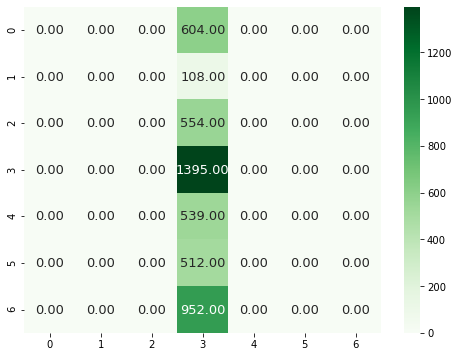

In [34]:
# Plot confusion matrix using seaborn instance
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(8,6))
cf_matrix = confusion_matrix(rounded_labels, predictions)
sns.heatmap(cf_matrix, annot=True, fmt='.2f', annot_kws={"size": 13}, 
                                cmap = 'Greens')

### 3.4 Spliting Training dataset for CNN Model 2

In [35]:
X_train, X_test, y_train, y_test = train_test_split(images_train, labels_train, test_size=0.50, random_state=42)

### 3.5 Build & Train CNN Model 2

> 4 Convolution layers followed with 2 fully connected layers.  

In [36]:
cnn_model2= Sequential()

# 1 - Convolution
cnn_model2.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
cnn_model2.add(BatchNormalization())
cnn_model2.add(Activation('relu'))
cnn_model2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model2.add(Dropout(0.25))

# 2nd Convolution layer
cnn_model2.add(Conv2D(128,(5,5), padding='same'))
cnn_model2.add(BatchNormalization())
cnn_model2.add(Activation('relu'))
cnn_model2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model2.add(Dropout(0.25))

# 3rd Convolution layer
cnn_model2.add(Conv2D(512,(3,3), padding='same'))
cnn_model2.add(BatchNormalization())
cnn_model2.add(Activation('relu'))
cnn_model2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model2.add(Dropout(0.25))

# 4th Convolution layer
cnn_model2.add(Conv2D(512,(3,3), padding='same'))
cnn_model2.add(BatchNormalization())
cnn_model2.add(Activation('relu'))
cnn_model2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model2.add(Dropout(0.25))

# Flattening
cnn_model2.add(Flatten())

# Fully connected layer 1st layer
cnn_model2.add(Dense(256))
cnn_model2.add(BatchNormalization())
cnn_model2.add(Activation('relu'))
cnn_model2.add(Dropout(0.25))

# Fully connected layer 2nd layer
cnn_model2.add(Dense(512))
cnn_model2.add(BatchNormalization())
cnn_model2.add(Activation('relu'))
cnn_model2.add(Dropout(0.25))

cnn_model2.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
cnn_model2.compile(optimizer=opt, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [45]:
# Reduce learning rate when a metric has stopped improving.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')

# Callback to save the Keras model or model weights at some frequency.
checkpoint = ModelCheckpoint(os.path.join(model_directory , "CNNModel2.h5"), monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [checkpoint, reduce_lr]

# Train a model
epochs = 1500
history = cnn_model2.fit(
    X_train, y_train,
    batch_size=100,
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=callbacks,
    shuffle=True
)

Train on 4664 samples, validate on 4664 samples
Epoch 1/1
4664/4664 [==============================] - 349s 75ms/step - loss: 1.7864 - accuracy: 0.3501 - val_loss: 2.0464 - val_accuracy: 0.2991

Epoch 00001: saving model to ./models\CNNModel2.h5


In [38]:
# Export model to disk.
cnn_model2.save(os.path.join(model_directory , "CNNModel2.h5"))

cnn_model2_json = cnn_model2.to_json()
with open(os.path.join(model_directory , "CNNModel2.json"), 'w') as json_file:
    json_file.write(cnn_model2_json)

In [39]:
# Predecting on Test cases
y_test = y_test.astype(int)
rounded_labels=np.argmax(y_test, axis=1)
predictions = cnn_model2.predict_classes(X_test)

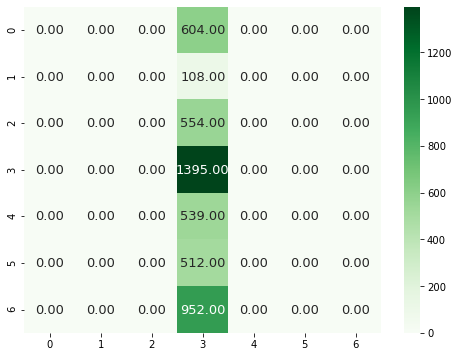

In [40]:
# Plot confusion matrix using seaborn instance
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(8,6))
cf_matrix = confusion_matrix(rounded_labels, predictions)
sns.heatmap(cf_matrix, annot=True, fmt='.2f', annot_kws={"size": 13}, 
                                cmap = 'Greens')

### 3.6 Predict on Public Dataset

In [41]:
# 1. CNN Model 1
testing_public_dataset = pd.read_csv(os.path.join(result_directory ,"predictions_label0.csv"))
testing_public_dataset = testing_public_dataset.drop(['Predictions'], axis=1)

public_test_prediction_cnn_model_1 = cnn_model1.predict_classes(public_test)
testing_public_dataset['Predictions'] = public_test_prediction_cnn_model_1
testing_public_dataset.to_csv(os.path.join(result_directory ,"45784477-deep_public_model1.csv"), index=False)

In [42]:
# 2. CNN Model 2
testing_public_dataset = pd.read_csv(os.path.join(result_directory ,"predictions_label0.csv"))
testing_public_dataset = testing_public_dataset.drop(['Predictions'], axis=1)

public_test_prediction_cnn_model_2 = cnn_model2.predict_classes(public_test)
testing_public_dataset['Predictions'] = public_test_prediction_cnn_model_2
testing_public_dataset.to_csv(os.path.join(result_directory ,"45784477-deep_public_model2.csv"), index=False)

### 3.7 Predict on Private Dataset

In [43]:
# 1. CNN Model 1
testing_private_dataset = pd.read_csv(os.path.join(result_directory ,"private_predictions_label0.csv"))
testing_private_dataset = testing_private_dataset.drop(['Predictions'], axis=1)

private_test_prediction_cnn_model_1 = cnn_model1.predict_classes(private_test)
testing_private_dataset['Predictions'] = private_test_prediction_cnn_model_1
testing_private_dataset.to_csv(os.path.join(result_directory ,"45784477-deep_private_model1.csv"), index=False)

In [44]:
# 2. CNN Model 2
testing_private_dataset = pd.read_csv(os.path.join(result_directory ,"private_predictions_label0.csv"))
testing_private_dataset = testing_private_dataset.drop(['Predictions'], axis=1)

private_test_prediction_cnn_model_2 = cnn_model2.predict_classes(private_test)
testing_private_dataset['Predictions'] = private_test_prediction_cnn_model_2
testing_private_dataset.to_csv(os.path.join(result_directory ,"45784477-deep_private_model2.csv"), index=False)

### 3.8 Notes on the Deep Learning Model


We have trained two fully connected convolutional neural networks.

1. 4 Convolution layers followed with 1 fully connected layer.
2. 4 Convolution layers followed with 2 fully connected layers.

The winner we are choosing on the basis of models accuracy and performance:

<hr/>

__Accuracy On Public Dataset__

CNN Model 1 : 0.58

CNN Model 2 : __0.63 (Stand in 18th Place)__ 

<hr/>

__Accuracy On Private Dataset__

CNN Model 1: 0.66

CNN Model 2: __0.68 (Stand in 10th Place)__ 

<hr/>

From the above models we have selected the __CNN Model 2__ as a best deep learning model for the given data set based on the accuracy and rank achieved in competition.

<hr/>
<br/>

# 4. Discussion of Model Performance and Implementation


### Comparing final conventional ML and deep learning models,

- The deep learning(CNN Model 2 - 63%) performed better than conventional model(LGBM-54%) by __9%__ on the public test set.   
- The deep learning model ranked __#18__ out of 69 submissions on the public test set. 
- While same deep learning  model ranked __#10__ out of 66 submissions on the private test set with the top-performing system having __68%__ accuracy.

<hr/>

### Trade off between Validation Set vs Public Set,

- Conventional Model Best Validation Accuracy is __55%__, while tested on publicc set gave __54%__ which is only __1%__ difference.
- Deep Learning Best Validation Accuracy is __66%__, while tested on publicc set gave __63%__ which is __3%__ difference.

Above tread off shows that both the techniques produced non-biased & generalised models.

<hr/>

### Trade off between Public Set vs Private Set,

- Deep Learning(CNN Model 2) Best Public Set Accuracy is __63%__, while tested on private set gave __68%__ which is __5%__ difference.

Above tread off shows that CNN Model 2 Network is non-biased & generalised. Also, can be used to solve other complex image classification problems too.

<hr/>

# <center>End Here</center>